# Mica's Attempt

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import sys
import pandas as pd
from scipy.interpolate import interp1d

In [2]:
snname = 'SN2021J'
filename =  snname + '_uvotB15.1.dat'
savename = snname + '_pylightcurve.jpg'
data = open(filename, 'r')

# Initializing lists needed to plot the different filters separately
uvw2mjd = []
uvw2mag = []
uvw2magerr = []
uvm2mjd = []
uvm2mag = []
uvm2magerr = []
uvw1mjd = []
uvw1mag = []
uvw1magerr = []
umjd = []
umag = []
umagerr = []
bmjd = []
bmag = []
bmagerr = []
vmjd = []
vmag = []
vmagerr = []

# Reading the data in from the file
for line in data:
    if not line[0] == "#":
        continue
    fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True)
print(fil, mjd, mag, magerr)
# replacing NULL with float value "nan"
for m in range(len(mag)):
    if mag[m] == "NULL":
        mag[m] = "nan"
for me in range(len(magerr)):
    if magerr[me] == "NULL":
        magerr[me] = "nan"
# turning lists into floats for appropriate data using list comprehension
mjd1 = [float(date) for date in mjd]
mag1 = [float(magnitude) for magnitude in mag]
magerr1 = [float(magnitudeerr) for magnitudeerr in magerr]
filters1 = fil
print(filters1, mjd1, mag1, magerr1)

# I needed to get rid of the NULL values in the ...15.1.dat files, so the next several lines are to make sure the 
# program doesn't shut down because of them
filterslist = []
mjdlist  = []
maglist = []
magerrlist = []
for ii in range(len(filters1)):
    if not np.isnan(mag1[ii]):
        filterslist.append(filters1[ii])
        maglist.append(mag1[ii])
        mjdlist.append(mjd1[ii])
        magerrlist.append(magerr1[ii])
filters = np.array(filterslist)
mjd = np.array(mjdlist)
mag = np.array(maglist)
magerr = np.array(magerrlist)
print(filters, mjd, mag, magerr)




# breaking up the filters, mjd, mag, and magerr arrays into separate arrays to make plotting easier
for i in range(len(filters)):
    if filters[i] == 'UVW2':
        uvw2mjd.append(mjd[i])
        uvw2mag.append(mag[i])
        uvw2magerr.append(magerr[i])
    if filters[i] == 'UVM2':
        uvm2mjd.append(mjd[i])
        uvm2mag.append(mag[i])
        uvm2magerr.append(magerr[i])
    if filters[i] == 'UVW1':
        uvw1mjd.append(mjd[i])
        uvw1mag.append(mag[i])
        uvw1magerr.append(magerr[i])
    if filters[i] == 'U':
        umjd.append(mjd[i])
        umag.append(mag[i])
        umagerr.append(magerr[i])
    if filters[i] == 'B':
        bmjd.append(mjd[i])
        bmag.append(mag[i])
        bmagerr.append(magerr[i])
    if filters[i] == 'V':
        vmjd.append(mjd[i])
        vmag.append(mag[i])
        vmagerr.append(magerr[i])

['UVW2' 'UVW2' 'UVM2' 'UVW1' 'UVW1' 'U' 'U' 'B' 'B' 'V'] ['59219.2093' '59220.6167' '59220.6213' '59219.2363' '59220.6127'
 '59219.2378' '59220.6140' '59219.2385' '59220.6147' '59220.6186'] ['NULL' '18.223' 'NULL' '17.777' '16.824' '16.536' '15.458' '15.978'
 '14.703' '14.418'] ['NULL' '0.339' 'NULL' '0.337' '0.196' '0.277' '0.154' '0.180' '0.101'
 '0.148']
['UVW2' 'UVW2' 'UVM2' 'UVW1' 'UVW1' 'U' 'U' 'B' 'B' 'V'] [59219.2093, 59220.6167, 59220.6213, 59219.2363, 59220.6127, 59219.2378, 59220.614, 59219.2385, 59220.6147, 59220.6186] [nan, 18.223, nan, 17.777, 16.824, 16.536, 15.458, 15.978, 14.703, 14.418] [nan, 0.339, nan, 0.337, 0.196, 0.277, 0.154, 0.18, 0.101, 0.148]
['UVW2' 'UVW1' 'UVW1' 'U' 'U' 'B' 'B' 'V'] [59220.6167 59219.2363 59220.6127 59219.2378 59220.614  59219.2385
 59220.6147 59220.6186] [18.223 17.777 16.824 16.536 15.458 15.978 14.703 14.418] [0.339 0.337 0.196 0.277 0.154 0.18  0.101 0.148]


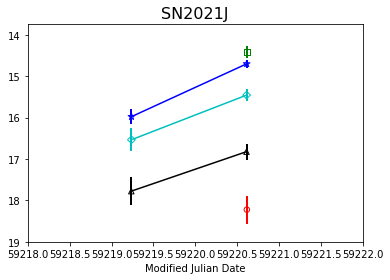

In [3]:
##########This begins plotting portion##########
plt.ion() #turns on interactive plotting
fig = plt.figure()
ax = fig.add_subplot(111)
#The next several lines are just to make sure the program doesn't shut down if one of the filters is missing 
if len(uvw2mag) > 0:
    ax.scatter(uvw2mjd, uvw2mag, linestyle='-', linewidth=1,marker='o', facecolors='none', edgecolors='r', s=30, label='uvw2', color = 'r')
    ax.errorbar(uvw2mjd, uvw2mag, yerr=uvw2magerr, elinewidth=2, capthick = 2, color = 'r')
if len(uvm2mag) > 0:
    ax.scatter(uvm2mjd, uvm2mag, linestyle='-', linewidth=1,marker='v',facecolors='none', edgecolors='m', s=30, label='uvm2', color= 'm')
    ax.errorbar(uvm2mjd, uvm2mag, yerr=uvm2magerr, elinewidth=2, capthick = 2, color='m')
if len(uvw1mag) > 0:
    ax.scatter(uvw1mjd, uvw1mag, linestyle='-', linewidth=1,marker='^', facecolors='none', edgecolors='k', s=30, label='uvw1', color= 'k')
    ax.errorbar(uvw1mjd, uvw1mag, yerr=uvw1magerr, elinewidth=2, capthick = 2, color='k')
if len(umag) > 0:
    ax.scatter(umjd, umag, linestyle='-', linewidth=1,marker='D',facecolors='none', edgecolors='c', s=30, label='uvot u', color= 'c')
    ax.errorbar(umjd, umag, yerr=umagerr, elinewidth=2, capthick = 2, color='c')
if len(bmag) > 0:
    ax.scatter(bmjd, bmag, linestyle='-', linewidth=1,marker='*',facecolors='none', edgecolors='b', s=50, label='uvot b', color= 'b')
    ax.errorbar(bmjd, bmag, yerr=bmagerr, elinewidth=2, capthick = 2, color='b')
if len(vmag) > 0:
    ax.scatter(vmjd, vmag, linestyle='-', linewidth=1,marker='s',facecolors='none', edgecolors='g', s=30, label='uvot v', color= 'g')
    ax.errorbar(vmjd, vmag, yerr=vmagerr, elinewidth=2, capthick = 2, color='g')

#ax.legend(bbox_to_anchor=(1.32,0.83))
#If you have labels specified in the plotting commands above, all you have to do is add this line to make a legend
#Also, apparently you can set the location to 'best' so it'll place it wherever python thinks it's the best
ax.set_xlabel('Modified Julian Date')

#ax.set_ylabel('Observed Vega Magnitude')

ax.set_title(snname, fontsize = 16)
#plt.title('UVOT Light Curves', fontsize = 12) 
#there aren't title and subtitle commands so instead I used suptitle and title to get a makeshift main title and subtitle

ax.axis([int(mjd.min())-1, math.ceil(np.amax(mjd))+1,math.ceil(np.amax(mag)+np.amax(magerr)), int(mag.min())-0.25])
'''
In order to make the axis format correctly, I used the minimum and maxiumum values for the MJD +/- 1 (in order to give the plots some extra
 space) on the x-axis, and the min and max values for the magnitude. The functions int() and math.ceil() are used to round the numbers to the
 nearest whole number to make the ends of the graph neater.
'''
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
#The line above makes sure that the x axis is formatted correctly. The Offset option in matplotlib is automatically activated, so for big
#numbers like the MJD, it cuts it off in a strange way that is awful to look at. This makes it readable.
#os.chdir(os.path.expanduser('~/Dropbox/SN/madison/'))
fig.savefig(savename) #you can uncomment this line if you want to save the figure to the SN file

#fig.show()
#os.chdir(os.path.expanduser('~/Dropbox/SN/madison/'))

# Testing it out on another Supernova

['UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1

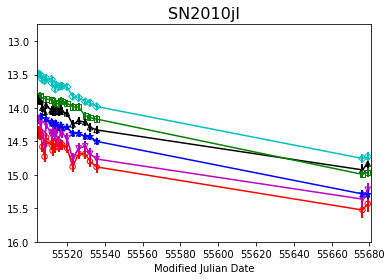

In [4]:
snname = 'SN2010jl'
filename =  snname + '_uvotB20.0.dat'
savename = snname + '_pylightcurve.jpg'
data = open(filename, 'r')

# Initializing lists needed to plot the different filters separately
uvw2mjd = []
uvw2mag = []
uvw2magerr = []
uvm2mjd = []
uvm2mag = []
uvm2magerr = []
uvw1mjd = []
uvw1mag = []
uvw1magerr = []
umjd = []
umag = []
umagerr = []
bmjd = []
bmag = []
bmagerr = []
vmjd = []
vmag = []
vmagerr = []

# Reading the data in from the file
for line in data:
    if not line[0] == "#":
        continue
    fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True)
print(fil, mjd, mag, magerr)
# replacing NULL with float value "nan"
for m in range(len(mag)):
    if mag[m] == "NULL":
        mag[m] = "nan"
for me in range(len(magerr)):
    if magerr[me] == "NULL":
        magerr[me] = "nan"
# turning lists into floats for appropriate data using list comprehension
mjd1 = [float(date) for date in mjd]
mag1 = [float(magnitude) for magnitude in mag]
magerr1 = [float(magnitudeerr) for magnitudeerr in magerr]
filters1 = fil
print(filters1, mjd1, mag1, magerr1)

# I needed to get rid of the NULL values in the ...15.1.dat files, so the next several lines are to make sure the 
# program doesn't shut down because of them
filterslist = []
mjdlist  = []
maglist = []
magerrlist = []
for ii in range(len(filters1)):
    if not np.isnan(mag1[ii]):
        filterslist.append(filters1[ii])
        maglist.append(mag1[ii])
        mjdlist.append(mjd1[ii])
        magerrlist.append(magerr1[ii])
filters = np.array(filterslist)
mjd = np.array(mjdlist)
mag = np.array(maglist)
magerr = np.array(magerrlist)
print(filters, mjd, mag, magerr)




# breaking up the filters, mjd, mag, and magerr arrays into separate arrays to make plotting easier
for i in range(len(filters)):
    if filters[i] == 'UVW2':
        uvw2mjd.append(mjd[i])
        uvw2mag.append(mag[i])
        uvw2magerr.append(magerr[i])
    if filters[i] == 'UVM2':
        uvm2mjd.append(mjd[i])
        uvm2mag.append(mag[i])
        uvm2magerr.append(magerr[i])
    if filters[i] == 'UVW1':
        uvw1mjd.append(mjd[i])
        uvw1mag.append(mag[i])
        uvw1magerr.append(magerr[i])
    if filters[i] == 'U':
        umjd.append(mjd[i])
        umag.append(mag[i])
        umagerr.append(magerr[i])
    if filters[i] == 'B':
        bmjd.append(mjd[i])
        bmag.append(mag[i])
        bmagerr.append(magerr[i])
    if filters[i] == 'V':
        vmjd.append(mjd[i])
        vmag.append(mag[i])
        vmagerr.append(magerr[i])


##########This begins plotting portion##########
plt.ion() #turns on interactive plotting
fig = plt.figure()
ax = fig.add_subplot(111)
#The next several lines are just to make sure the program doesn't shut down if one of the filters is missing 
if len(uvw2mag) > 0:
    ax.scatter(uvw2mjd, uvw2mag, linestyle='-', linewidth=1,marker='o', facecolors='none', edgecolors='r', s=30, label='uvw2', color = 'r')
    ax.errorbar(uvw2mjd, uvw2mag, yerr=uvw2magerr, elinewidth=2, capthick = 2, color = 'r')
if len(uvm2mag) > 0:
    ax.scatter(uvm2mjd, uvm2mag, linestyle='-', linewidth=1,marker='v',facecolors='none', edgecolors='m', s=30, label='uvm2', color= 'm')
    ax.errorbar(uvm2mjd, uvm2mag, yerr=uvm2magerr, elinewidth=2, capthick = 2, color='m')
if len(uvw1mag) > 0:
    ax.scatter(uvw1mjd, uvw1mag, linestyle='-', linewidth=1,marker='^', facecolors='none', edgecolors='k', s=30, label='uvw1', color= 'k')
    ax.errorbar(uvw1mjd, uvw1mag, yerr=uvw1magerr, elinewidth=2, capthick = 2, color='k')
if len(umag) > 0:
    ax.scatter(umjd, umag, linestyle='-', linewidth=1,marker='D',facecolors='none', edgecolors='c', s=30, label='uvot u', color= 'c')
    ax.errorbar(umjd, umag, yerr=umagerr, elinewidth=2, capthick = 2, color='c')
if len(bmag) > 0:
    ax.scatter(bmjd, bmag, linestyle='-', linewidth=1,marker='*',facecolors='none', edgecolors='b', s=50, label='uvot b', color= 'b')
    ax.errorbar(bmjd, bmag, yerr=bmagerr, elinewidth=2, capthick = 2, color='b')
if len(vmag) > 0:
    ax.scatter(vmjd, vmag, linestyle='-', linewidth=1,marker='s',facecolors='none', edgecolors='g', s=30, label='uvot v', color= 'g')
    ax.errorbar(vmjd, vmag, yerr=vmagerr, elinewidth=2, capthick = 2, color='g')

#ax.legend(bbox_to_anchor=(1.32,0.83))
#If you have labels specified in the plotting commands above, all you have to do is add this line to make a legend
#Also, apparently you can set the location to 'best' so it'll place it wherever python thinks it's the best
ax.set_xlabel('Modified Julian Date')

#ax.set_ylabel('Observed Vega Magnitude')

ax.set_title(snname, fontsize = 16)
#plt.title('UVOT Light Curves', fontsize = 12) 
#there aren't title and subtitle commands so instead I used suptitle and title to get a makeshift main title and subtitle

ax.axis([int(mjd.min())-1, math.ceil(np.amax(mjd))+1,math.ceil(np.amax(mag)+np.amax(magerr)), int(mag.min())-0.25])
'''
In order to make the axis format correctly, I used the minimum and maxiumum values for the MJD +/- 1 (in order to give the plots some extra
 space) on the x-axis, and the min and max values for the magnitude. The functions int() and math.ceil() are used to round the numbers to the
 nearest whole number to make the ends of the graph neater.
'''
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
#The line above makes sure that the x axis is formatted correctly. The Offset option in matplotlib is automatically activated, so for big
#numbers like the MJD, it cuts it off in a strange way that is awful to look at. This makes it readable.
#os.chdir(os.path.expanduser('~/Dropbox/SN/madison/'))
fig.savefig(savename) #you can uncomment this line if you want to save the figure to the SN file

#fig.show()
#os.chdir(os.path.expanduser('~/Dropbox/SN/madison/'))

# Turning code into a function

In [5]:
def lcplot(snname):
    filename = snname
    # setting up file name grab
    def varName(p):
        for k, v in globals().items():
            if id(p) == id(v):
                return k
    # turning into string
    snstr = varName(snname)
    savename = snstr + '_pylightcurve.jpg'
    data = open(filename, 'r')
    # Initializing lists needed to plot the different filters separately
    uvw2mjd = []
    uvw2mag = []
    uvw2magerr = []
    uvm2mjd = []
    uvm2mag = []
    uvm2magerr = []
    uvw1mjd = []
    uvw1mag = []
    uvw1magerr = []
    umjd = []
    umag = []
    umagerr = []
    bmjd = []
    bmag = []
    bmagerr = []
    vmjd = []
    vmag = []
    vmagerr = []
    # Reading the data in from the file
    for line in data:
        if not line[0] == "#":
            continue
        fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True)
    print(fil, mjd, mag, magerr)
    # replacing NULL with float value "nan"
    for m in range(len(mag)):
        if mag[m] == "NULL":
            mag[m] = "nan"
    for me in range(len(magerr)):
        if magerr[me] == "NULL":
            magerr[me] = "nan"
    # turning lists into floats for appropriate data using list comprehension
    mjd1 = [float(date) for date in mjd]
    mag1 = [float(magnitude) for magnitude in mag]
    magerr1 = [float(magnitudeerr) for magnitudeerr in magerr]
    filters1 = fil
    print(filters1, mjd1, mag1, magerr1)
    # I needed to get rid of the NULL values in the ...15.1.dat files, so the next several lines are to make sure the 
    # program doesn't shut down because of them
    filterslist = []
    mjdlist  = []
    maglist = []
    magerrlist = []
    for ii in range(len(filters1)):
        if not np.isnan(mag1[ii]):
            filterslist.append(filters1[ii])
            maglist.append(mag1[ii])
            mjdlist.append(mjd1[ii])
            magerrlist.append(magerr1[ii])
    filters = np.array(filterslist)
    mjd = np.array(mjdlist)
    mag = np.array(maglist)
    magerr = np.array(magerrlist)
    print(filters, mjd, mag, magerr)
    # breaking up the filters, mjd, mag, and magerr arrays into separate arrays to make plotting easier
    for i in range(len(filters)):
        if filters[i] == 'UVW2':
            uvw2mjd.append(mjd[i])
            uvw2mag.append(mag[i])
            uvw2magerr.append(magerr[i])
        if filters[i] == 'UVM2':
            uvm2mjd.append(mjd[i])
            uvm2mag.append(mag[i])
            uvm2magerr.append(magerr[i])
        if filters[i] == 'UVW1':
            uvw1mjd.append(mjd[i])
            uvw1mag.append(mag[i])
            uvw1magerr.append(magerr[i])
        if filters[i] == 'U':
            umjd.append(mjd[i])
            umag.append(mag[i])
            umagerr.append(magerr[i])
        if filters[i] == 'B':
            bmjd.append(mjd[i])
            bmag.append(mag[i])
            bmagerr.append(magerr[i])
        if filters[i] == 'V':
            vmjd.append(mjd[i])
            vmag.append(mag[i])
            vmagerr.append(magerr[i])
    ##########This begins plotting portion##########
    plt.ion() #turns on interactive plotting
    fig = plt.figure()
    ax = fig.add_subplot(111)
    #The next several lines are just to make sure the program doesn't shut down if one of the filters is missing 
    if len(uvw2mag) > 0:
        ax.scatter(uvw2mjd, uvw2mag, linestyle='-', linewidth=1,marker='o', facecolors='none', edgecolors='r', s=30, label='uvw2', color = 'r')
        ax.errorbar(uvw2mjd, uvw2mag, yerr=uvw2magerr, elinewidth=2, capthick = 2, color = 'r')
    if len(uvm2mag) > 0:
        ax.scatter(uvm2mjd, uvm2mag, linestyle='-', linewidth=1,marker='v',facecolors='none', edgecolors='m', s=30, label='uvm2', color= 'm')
        ax.errorbar(uvm2mjd, uvm2mag, yerr=uvm2magerr, elinewidth=2, capthick = 2, color='m')
    if len(uvw1mag) > 0:
        ax.scatter(uvw1mjd, uvw1mag, linestyle='-', linewidth=1,marker='^', facecolors='none', edgecolors='k', s=30, label='uvw1', color= 'k')
        ax.errorbar(uvw1mjd, uvw1mag, yerr=uvw1magerr, elinewidth=2, capthick = 2, color='k')
    if len(umag) > 0:
        ax.scatter(umjd, umag, linestyle='-', linewidth=1,marker='D',facecolors='none', edgecolors='c', s=30, label='uvot u', color= 'c')
        ax.errorbar(umjd, umag, yerr=umagerr, elinewidth=2, capthick = 2, color='c')
    if len(bmag) > 0:
        ax.scatter(bmjd, bmag, linestyle='-', linewidth=1,marker='*',facecolors='none', edgecolors='b', s=50, label='uvot b', color= 'b')
        ax.errorbar(bmjd, bmag, yerr=bmagerr, elinewidth=2, capthick = 2, color='b')
    if len(vmag) > 0:
        ax.scatter(vmjd, vmag, linestyle='-', linewidth=1,marker='s',facecolors='none', edgecolors='g', s=30, label='uvot v', color= 'g')
        ax.errorbar(vmjd, vmag, yerr=vmagerr, elinewidth=2, capthick = 2, color='g')
    #ax.legend(bbox_to_anchor=(1.32,0.83))
    #If you have labels specified in the plotting commands above, all you have to do is add this line to make a legend
    #Also, apparently you can set the location to 'best' so it'll place it wherever python thinks it's the best
    ax.set_xlabel('Modified Julian Date')
    #ax.set_ylabel('Observed Vega Magnitude')
    ax.set_title(snstr, fontsize = 16)
    #plt.title('UVOT Light Curves', fontsize = 12) 
    #there aren't title and subtitle commands so instead I used suptitle and title to get a makeshift main title and subtitle
    ax.axis([int(mjd.min())-1, math.ceil(np.amax(mjd))+1,math.ceil(np.amax(mag)+np.amax(magerr)), int(mag.min())-0.25])
    '''
    In order to make the axis format correctly, I used the minimum and maxiumum values for the MJD +/- 1 (in order to give the plots some extra
     space) on the x-axis, and the min and max values for the magnitude. The functions int() and math.ceil() are used to round the numbers to the
     nearest whole number to make the ends of the graph neater.
    '''
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
    #The line above makes sure that the x axis is formatted correctly. The Offset option in matplotlib is automatically activated, so for big
    #numbers like the MJD, it cuts it off in a strange way that is awful to look at. This makes it readable.
    #os.chdir(os.path.expanduser('~/Dropbox/SN/madison/'))
    fig.savefig(savename) #you can uncomment this line if you want to save the figure to the SN file
    #fig.show()
    #os.chdir(os.path.expanduser('~/Dropbox/SN/madison/'))

### Setting up file grab

In [6]:
SN2006jc = "SN2006jc_uvotB15.1.dat"
SN2007od = "SN2007od_uvotB15.1.dat"
SN2008M = "SN2008M_uvotB15.1.dat"
SN2008aw = "SN2008aw_uvotB15.1.dat"
SN2009bw = "SN2009bw_uvotB15.1.dat"
SN2012aw = "SN2012aw_uvotB15.1.dat"
SN2012A = "SN2012A_uvotB15.1.dat"
SN2013ej = "SN2013ej_uvotB15.1.dat"
SN2016gkg = "SN2016gkg_uvotB15.1.dat"
SN2017eaw = "SN2017eaw_uvotB15.1.dat"
SN2017egm = "SN2017egm_uvotB15.1.dat"
ASASSN14ha = "ASASSN14ha_uvotB15.1.dat"
SN2007pk = "SN2007pk_uvotB15.1.dat"
SN2013df = "SN2013df_uvotB15.1.dat"
SN2011dh = "SN2011dh_uvotB15.1.dat"
SN2014G = "SN2014G_uvotB15.1.dat"
SN2010jl = "SN2010jl_uvotB20.0.dat"
SN2011ht = "SN2011ht_uvotB15.1.dat"
SN2013L = "SN2013L_uvotB15.1.dat"
SN2015bf = "SN2015bf_uvotB15.1.dat"
SN2005cs = "SN2005cs_uvotB15.1.dat"
SN2006bp = "SN2006bp_uvotB15.1.dat"
SN2013ab = "SN2013ab_uvotB15.1.dat"

['UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U'
 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U'
 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 

['UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'U'
 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'V'
 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V'] ['54409.7501' '54411.2910' '54413.4489' '54413.4678' '54415.3947'
 '54417.4007' '54421.4818' '54427.6373' '54438.2170' '54448.7567'
 '54472.8004' '54409.7222' '54411.2937' '54413.4499' '54415.4007'
 '54417.4054' '54421.4864' '54427.6400' '54438.2212' '54448.7578'
 '54472.8363' '54409.7438' '54411.2873' '54415.3882' '54417.3954'
 '54421.4765' '54427.6339' '54438.2122' '54448.7587' '54472.7949'
 '54409.7457' '54411.2883' '54415.3903' '54417.3970' '54421.4781'
 '54427.6348' '54438.2138' '54448.0883' '54472.7966' '54409.7469'
 '54411.2891' '54415.3917' '54417.3981' '54421.4792' '54427.6355'
 '54438.2148' '54448.0895' '54472.7977' '54409.7530' '54411.2926'
 '54415.3983' '5

['UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'U' 'U' 'U' 'U' 'U' 'B' 'B' 'B' 'B' 'B' 'V' 'V' 'V' 'V' 'V'] ['54528.6641' '54530.7375' '54532.9949' '54534.6643' '54538.6457'
 '54541.5945' '54579.8139' '54528.6752' '54530.7614' '54533.0208'
 '54534.6671' '54538.6505' '54541.5973' '54579.7183' '54528.6846'
 '54530.7623' '54532.9877' '54534.6615' '54538.6402' '54541.5910'
 '54579.5802' '54528.6552' '54534.6627' '54538.6418' '54541.5919'
 '54579.5811' '54528.6578' '54534.6633' '54538.6429' '54541.5926'
 '54579.5816' '54528.6704' '54534.6665' '54538.6484' '54541.5959'
 '54579.8167'] ['14.929' '15.710' '16.409' '16.654' '17.744' '18.335' 'NULL' '14.946'
 '15.500' '16.387' '16.574' '17.740' '18.375' 'NULL' '14.772' '15.218'
 '15.724' '15.938' '16.751' '17.265' 'NULL' '14.812' '15.249' '15.807'
 '16.115' 'NULL' '15.999' '16.107' '16.225' '16.465' '18.154' '15.942'
 '15.903' '15.931' '16.041' 

['UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'U' 'U' 'U' 'U' 'U' 'U'
 'U' 'U' 'B' 'B' 'B' 'B' 'B' 'V' 'V' 'V' 'V' 'V' 'V'] ['55937.1043' '55940.0766' '55940.6129' '55941.3740' '55941.3863'
 '55942.5120' '55947.1958' '55946.9162' '55937.1092' '55940.0810'
 '55942.5183' '55946.9184' '55937.1346' '55940.0835' '55942.5234'
 '55946.9200' '55947.4219' '55936.8058' '55937.1016' '55940.0369'
 '55940.0377' '55940.5107' '55944.1179' '55946.7812' '55946.7820'
 '55936.8091' '55937.1023' '55940.0388' '55940.0396' '55946.7831'
 '55936.7951' '55937.1063' '55940.0408' '55940.0417' '55946.7851'
 '55946.7854'] ['12.974' '13.750' '13.922' '14.168' '14.181' '14.419' '16.377' '16.068'
 '12.602' '13.478' '14.397' '16.242' '12.621' '13.160' '13.809' '15.111'
 '15.281' '12.845' '12.816' '13.048' '12.958' '13.088' '13.453' '13.921'
 '13.801' '14.139' '14.056' '14.005' '13.983' '14.286' '14.167' '14.158'
 '13.885' '14.019' '14.042' '14.

['UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'U'
 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U'
 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'V' 'V' 'V'
 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V'
 'V' 'V'] ['54589.3770' '54772.6130' '54796.3674' '57652.7284' '57653.1172'
 '57653.7326' '57657.1967' '57656.7322' '57657.6079' '57657.

 15.437 15.611 16.151 16.318 16.519 16.692 16.62 ] [0.045 0.09  0.079 0.235 0.168 0.178 0.174 0.136 0.144 0.137 0.129 0.115
 0.128 0.127 0.15  0.235 0.225 0.262 0.09  0.059 0.082 0.215 0.185 0.164
 0.175 0.161 0.149 0.189 0.133 0.163 0.172 0.238 0.287 0.322 0.33  0.045
 0.058 0.075 0.169 0.133 0.12  0.093 0.095 0.089 0.093 0.082 0.078 0.08
 0.087 0.105 0.136 0.141 0.178 0.182 0.27  0.269 0.273 0.23  0.336 0.043
 0.069 0.08  0.129 0.103 0.095 0.074 0.072 0.07  0.07  0.064 0.062 0.063
 0.064 0.071 0.091 0.093 0.136 0.128 0.191 0.16  0.203 0.166 0.279 0.049
 0.071 0.109 0.085 0.073 0.063 0.062 0.061 0.063 0.054 0.051 0.057 0.052
 0.058 0.064 0.063 0.074 0.074 0.087 0.087 0.095 0.095 0.2   0.063 0.089
 0.145 0.102 0.086 0.068 0.068 0.065 0.062 0.058 0.058 0.058 0.059 0.065
 0.062 0.072 0.08  0.08  0.092 0.088 0.158]
['UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2

 'V' 'V' 'V'] [57887.5955 57887.6552 57887.9226 57887.9233 57888.6631 57888.6638
 57888.7291 57888.7298 57888.8045 57888.8711 57889.8542 57889.8549
 57890.1159 57890.1166 57890.1855 57890.1862 57891.8462 57895.7796
 57897.5514 57897.5521 57899.4203 57902.0791 57902.275  57902.2757
 57904.0624 57906.618  57908.449  57910.2092 57912.6938 57914.2942
 57918.8509 57920.8046 57962.6201 57977.9357 57981.4174 58004.6847
 57887.6034 57887.926  57887.9267 57887.9283 57888.6665 57888.6672
 57888.6702 57889.8576 57889.8583 57889.8605 57890.12   57890.1233
 57890.1889 57890.1896 57890.1928 57891.8489 57891.8496 57891.8541
 57897.5549 57897.5556 57897.5613 57899.4238 57899.4245 57899.428
 57902.0823 57902.2784 57902.2791 57904.0687 57906.6214 57908.4555
 57910.2128 57912.7    57914.3006 57918.8533 57920.8111 57887.5907
 57887.652  57887.9181 57888.6586 57888.7246 57888.7851 57888.8558
 57888.9154 57889.8497 57890.1114 57891.841  57895.7541 57895.8205
 57897.5469 57899.4158 57902.0757 57902.2705 5790

['UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U'
 'U' 'U' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'V' 'V' 'V' 'V' 'V'
 'V' 'V' 'V' 'V' 'V' 'V'] ['54418.1390' '54419.7133' '54420.1789' '54421.1833' '54424.5819'
 '54429.1486' '54433.4073' '54436.4499' '54440.3038' '54451.3735'
 '54466.2983' '54418.1403' '54419.7153' '54420.1830' '54421.1877'
 '54424.5680' '54429.1520' '54433.4104' '54436.4542' '54440.3081'
 '54451.3766' '54466.3009' '54417.1621' '54418.1373' '54419.7109'
 '54420.1744' '54421.1784' '54424.5692' '54429.1444' '54433.4031'
 '54436.4449' '54440.2988' '54451.3795' '54461.5503' '54466.3034'
 '54418.1378' '54419.7116' '54420.1759' '54421.1800' '54429.1456'
 '54433.4041' '54436.4464' '54440.3003' '54451.1766' '54461.5203'
 '54473.5991' '54418.1

['UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U'
 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U'
 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'B' 'B' 'B' 'B' 'B'
 

['UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'U'
 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V'
 'V'] ['56672.7630' '56673.7838' '56674.1728' '56675.8771' '56676.2059'
 '56676.4796' '56677.7741' '56678.9076' '56679.9642' '56680.7835'
 '56680.9704' '56681.8663' '56686.4091' '56695.8502' '56698.1764'
 '56672.7731' '56674.1776' '56675.8811' '56676.2098' '56677.9136'
 '56678.9118' '56679.9681' '56680.9726' '56681.8723' '56686.4139'
 '56695.8538' '56698.1817' '56672.7582' '56673.7908' '56674.2032'
 '56675.8739' '56676.2023' '56677.7701' '56678.9041' '56679.9611'
 '56680.9684' '56681.8614' '56686.4040' '56695.8471' '56698.1721'
 '56672.7596' '56674.2045' '5667

['UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'U'
 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U'
 'U' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V'
 'V' 'V' 'V' 'V' 'V'] ['55841.7082' '55855.8208' '55864.9070' '55873.3637' '55879.7547'
 '55882.7348' '55888.5278' '55894.5078' '55897.8255' '55903.3585'
 '55906.9119' '55912.6185' '55919.7170' '55922.1530' '55939.0757'
 '55950.2431' '55974.7679' '55989.0020' '55993.5134' '56102.3258'
 '55841.7130' '55855.8258' '55864.9128' '55873.3693' '55879.7604'

['UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'U' 'U' 'U' 'U' 'U' 'U'
 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V'
 'V' 'V' 'V' 'V' 'V'] ['56321.0113' '56322.5673' '56322.8508' '56324.4887' '56326.4013'
 '56328.3028' '56330.2695' '56332.9085' '56336.8251' '56338.1272'
 '56340.7307' '56342.5883' '56344.3900' '56346.4258' '56348.5275'
 '56350.6425' '56352.7698' '56354.5401' '56356.8798' '56786.5

['UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U'
 'U' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V'] ['57370.3189' '57371.7048' '57372.7172' '57376.6802' '57377.4288'
 '57378.6011' '57380.2616' '57382.8224' '57384.0898' '57386.5795'
 '57370.3321' '57372.7234' '57377.2390' '57378.6064' '57380.2684'
 '57382.8263' '57384.0942' '57386.5850' '57370.3141' '57371.7231'
 '57377.2302' '57378.5966' '57380.2560' '57382.8192' '57384.0861'
 '57386.5750' '57370.3155' '57372.7143' '57376.6649' '57377.2315'
 '57378.5981' '57380.2579' '57382.8204' '57384.0876' '57386.5768'
 '57370.3165' '57372.7152' '57377.2322' '57378.5989' '57380.2588'
 '57382.8210' '57384.0883' '57386.5777' '57370.3212' '57372.7201'
 '57377.2361' '57378.6034' '57380.2644' '57382.8243' '57384.0922'
 '57386.5824'] ['15.211' '15.411' '15.525' '16.574' '

['UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U'
 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'V' 'V'
 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V'] ['53835.5824' '53836.4459' '53837.5528' '53838.4623' '53840.4692'
 '53840.7773' '53842.3734' '53842.7865' '53845.6292' '53847.1675'
 '53849.1067' '53851.2441' '53853.2055' '53856.6316' '53835.5920'
 '53836.4471' '53837.5546' '53838.4662' '53840.4734' '53840.7841'
 '53842.3749' '53842.7936' '53845.6361' '53847.1735' '53849.1128'
 '53851.2455' '53853.1751' '53856.6028' '53835.6050' '53836.4446'
 '53837.5508' '53838.4569' '53840

/Users/Emily/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


['UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U'
 'U' 'U' 'U' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V'
 'V' 'V' 'V' 'V'] ['56344.4677' '56345.0177' '56347.4729' '56349.8072' '56349.7928'
 '56350.4756' '56353.5918' '56356.6288' '56364.6640' '56368.7078'
 '56371.4726' '56378.4628' '56382.8940' '56386.7030' '56392.3412'
 '56407.4732' '56412.8202' '56425.7722' '56428.4986' '56432.4474'
 '56442.4523' '56457.4220' '56344.4706' '56347.4776' '56350.4817'
 '56353.

['UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'U' 'U' 'U' 'U' 'U' 'U'
 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'V' 'V' 'V'
 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V'] ['56911.8555' '56912.4597' '56913.3993' '56913.8395' '56914.8301'
 '56915.2312' '56917.5943' '56919.9247' '56921.9221' '56923.0504'
 '56930.5561' '56932.0450' '56934.8532' '56936.9758' '56938.5806'
 '56940.6441' '56945.1082' '56949.6073' '56955.4842' '56911.8589'
 '56912.4632' '56913.8093' '56914.8336' '56915.2346' '56917.5978'
 '56919.9281' '56921.9255' '5

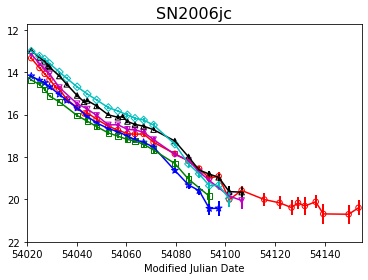

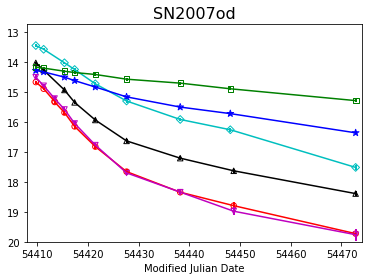

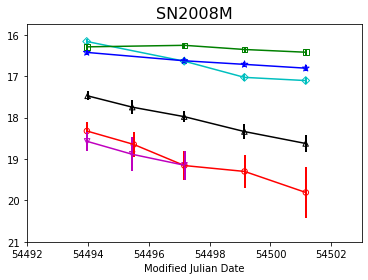

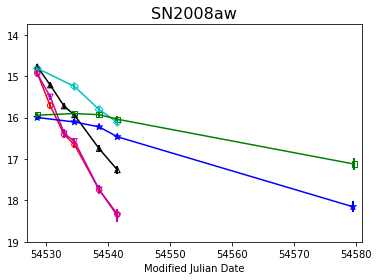

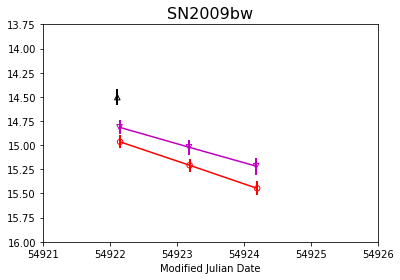

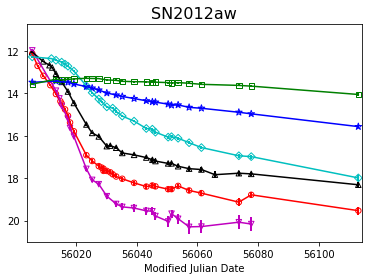

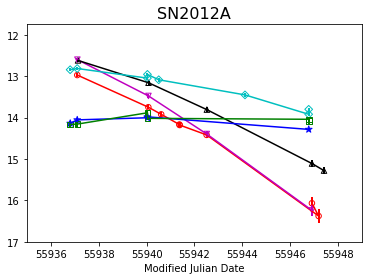

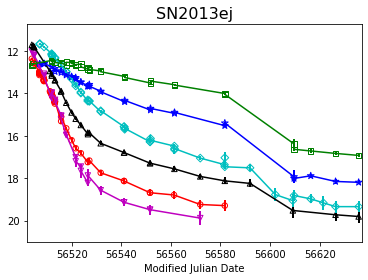

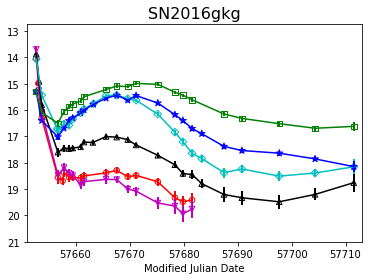

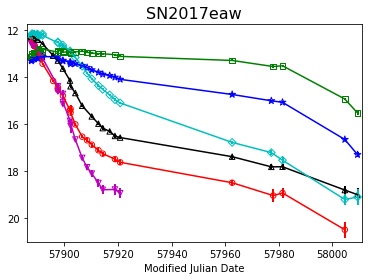

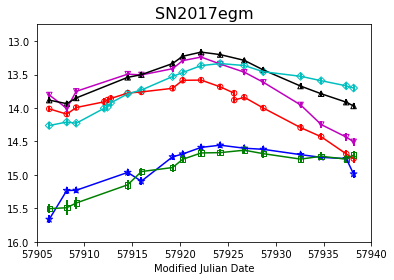

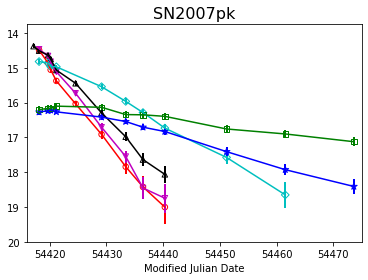

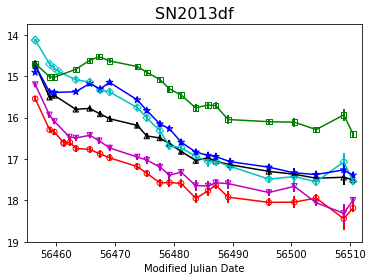

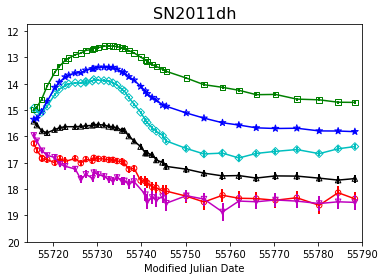

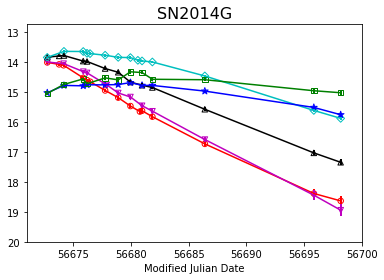

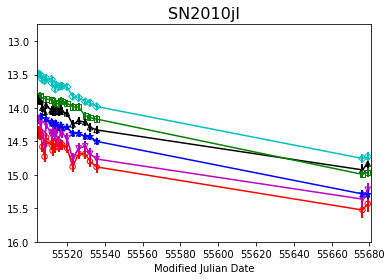

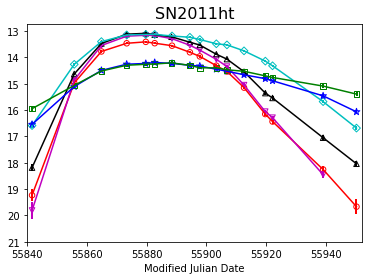

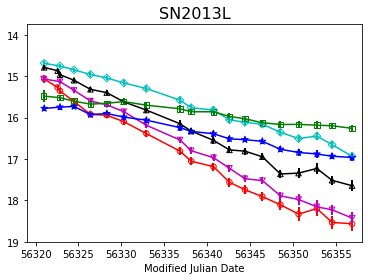

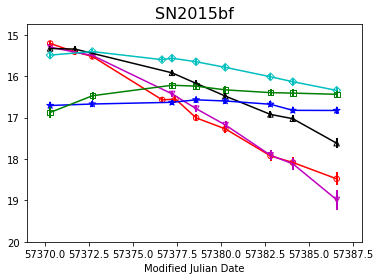

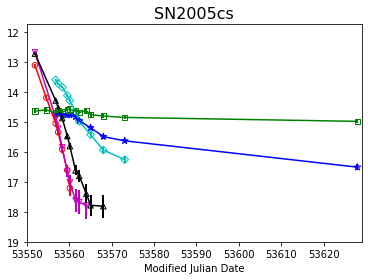

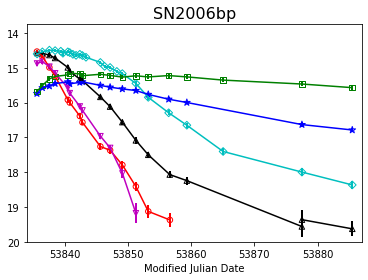

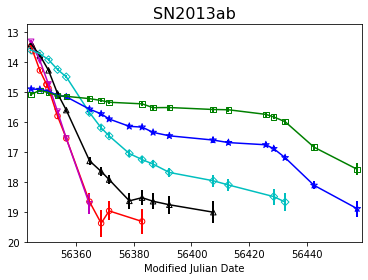

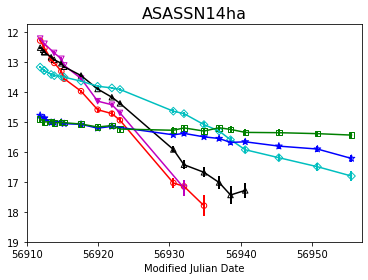

In [7]:
############### putting data files into an array to run through the for loop

snlist = [SN2006jc, SN2007od, SN2008M, SN2008aw, SN2009bw, SN2012aw, SN2012A, SN2013ej, SN2016gkg, SN2017eaw, 
          SN2017egm, SN2007pk, SN2013df, SN2011dh, SN2014G, SN2010jl, SN2011ht, SN2013L, SN2015bf, SN2005cs, 
          SN2006bp, SN2013ab, ASASSN14ha] 
for sn in range(len(snlist)):
    lcplot(snlist[sn])

In [8]:
#loading the data into seperate lists as strings

name, targetid, obs_date, filter_1, u_mag, filter_2, b_mag, filter_3, v_mag, filter_4, uvm2_mag, filter_5, uvw1_mag, filter_6, uvw2_mag = np.loadtxt('/Users/Emily/Desktop/ARP/Supernovae/SNMagnitudeData_SpecPhot.txt',dtype=str,skiprows=1,delimiter=',',unpack=True)

In [9]:
#turning lists into floats for appropriate data using list comprehension

mjd_date = [float(date) for date in obs_date]
u_mag_s = [float(magnitude) for magnitude in u_mag]
b_mag_s = [float(magnitude) for magnitude in b_mag]
v_mag_s = [float(magnitude) for magnitude in v_mag]
uvm2_mag_s = [float(magnitude) for magnitude in uvm2_mag]
uvw1_mag_s = [float(magnitude) for magnitude in uvw1_mag]
uvw2_mag_s = [float(magnitude) for magnitude in uvw2_mag]

In [100]:
#Create empty arrays to append the data to

SN2012aw_date = []*1
SN2012aw_umag = []*1
SN2012aw_bmag = []*1
SN2012aw_vmag = []*1
SN2012aw_uvm2mag = []*1
SN2012aw_uvw1mag = []*1
SN2012aw_uvw2mag = []*1

In [101]:
#Appending mjd dates and filter magnitudes into previously empty arrays

for i in range(len(name)):
    if name[i] == "SN2012aw":
        SN2012aw_date.append(mjd_date[i])
        SN2012aw_umag.append(u_mag_s[i])
        SN2012aw_bmag.append(b_mag_s[i])
        SN2012aw_vmag.append(v_mag_s[i])
        SN2012aw_uvm2mag.append(uvm2_mag_s[i])
        SN2012aw_uvw1mag.append(uvw1_mag_s[i])
        SN2012aw_uvw2mag.append(uvw2_mag_s[i])

## Final Plots for Mica

['UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'U' 'U' 'U' 'U' 'U' 'U'
 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U'
 'U' 'U' 'U' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V'
 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V'] ['56005.7447' '56007.4913' '56009.4084' '56011.6800' '56013.5296'
 '56014.9895' '5601

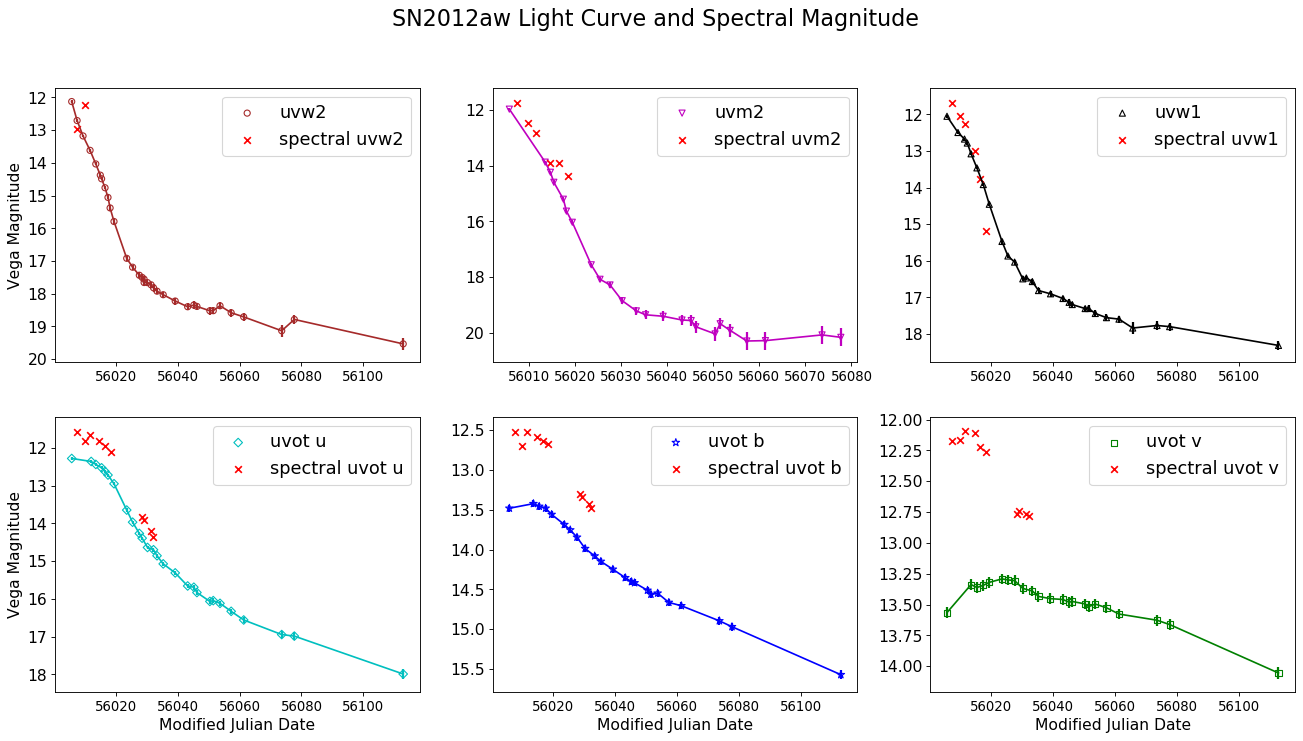

In [102]:
snname = 'SN2012aw'
filename =  snname + '_uvotB15.1.dat'
savename = snname + '_pylightcurve_s.jpg'
data = open(filename, 'r')

# Initializing lists needed to plot the different filters separately
uvw2mjd = []
uvw2mag = []
uvw2magerr = []
uvm2mjd = []
uvm2mag = []
uvm2magerr = []
uvw1mjd = []
uvw1mag = []
uvw1magerr = []
umjd = []
umag = []
umagerr = []
bmjd = []
bmag = []
bmagerr = []
vmjd = []
vmag = []
vmagerr = []

# Reading the data in from the file
for line in data:
    if not line[0] == "#":
        continue
    fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True)
print(fil, mjd, mag, magerr)
# replacing NULL with float value "nan"
for m in range(len(mag)):
    if mag[m] == "NULL":
        mag[m] = "nan"
for me in range(len(magerr)):
    if magerr[me] == "NULL":
        magerr[me] = "nan"
# turning lists into floats for appropriate data using list comprehension
mjd1 = [float(date) for date in mjd]
mag1 = [float(magnitude) for magnitude in mag]
magerr1 = [float(magnitudeerr) for magnitudeerr in magerr]
filters1 = fil
print(filters1, mjd1, mag1, magerr1)

# I needed to get rid of the NULL values in the ...15.1.dat files, so the next several lines are to make sure the 
# program doesn't shut down because of them
filterslist = []
mjdlist  = []
maglist = []
magerrlist = []
for ii in range(len(filters1)):
    if not np.isnan(mag1[ii]):
        filterslist.append(filters1[ii])
        maglist.append(mag1[ii])
        mjdlist.append(mjd1[ii])
        magerrlist.append(magerr1[ii])
filters = np.array(filterslist)
mjd = np.array(mjdlist)
mag = np.array(maglist)
magerr = np.array(magerrlist)
print(filters, mjd, mag, magerr)




# breaking up the filters, mjd, mag, and magerr arrays into separate arrays to make plotting easier
for i in range(len(filters)):
    if filters[i] == 'UVW2':
        uvw2mjd.append(mjd[i])
        uvw2mag.append(mag[i])
        uvw2magerr.append(magerr[i])
    if filters[i] == 'UVM2':
        uvm2mjd.append(mjd[i])
        uvm2mag.append(mag[i])
        uvm2magerr.append(magerr[i])
    if filters[i] == 'UVW1':
        uvw1mjd.append(mjd[i])
        uvw1mag.append(mag[i])
        uvw1magerr.append(magerr[i])
    if filters[i] == 'U':
        umjd.append(mjd[i])
        umag.append(mag[i])
        umagerr.append(magerr[i])
    if filters[i] == 'B':
        bmjd.append(mjd[i])
        bmag.append(mag[i])
        bmagerr.append(magerr[i])
    if filters[i] == 'V':
        vmjd.append(mjd[i])
        vmag.append(mag[i])
        vmagerr.append(magerr[i])

##########Interpolation##########   
#f1 = interp1d(uvw2mjd, uvw2mag)
#ynew1 = f1(SN2012aw_date)

#f2 = interp1d(uvm2mjd, uvm2mag)
#ynew2 = f2(SN2012aw_date)

#f3 = interp1d(uvw1mjd, uvw1mag)
#ynew3 = f3(SN2012aw_date)

#f4 = interp1d(umjd, umag)
#ynew4 = f4(SN2012aw_date)

#f5 = interp1d(bmjd, bmag)
#ynew5 = f5(SN2012aw_date)

#f6 = interp1d(vmjd, vmag)
#ynew6 = f6(SN2012aw_date)
        
        
##########This begins plotting portion##########
fig = plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.suptitle('SN2012aw Light Curve and Spectral Magnitude',fontsize=20, fontname="Times New Roman Bold")
#The next several lines are just to make sure the program doesn't shut down if one of the filters is missing
if len(uvw2mag) > 0:
    plt.subplot(231)
    plt.scatter(uvw2mjd, uvw2mag, linestyle='-', linewidth=1, marker='o', facecolors='none', edgecolors='brown', s=30, label='uvw2', color = 'brown')
    #plt.plot(SN2012aw_date, ynew1, 'X', color = 'tab:orange')
    plt.errorbar(uvw2mjd, uvw2mag, yerr=uvw2magerr, elinewidth=2, capthick = 2, color = 'brown')
    plt.scatter(SN2012aw_date, SN2012aw_uvw2mag, marker='x', label='spectral uvw2', color = 'r')
    plt.gca().invert_yaxis()
    plt.ylabel("Vega Magnitude",fontsize=14)
    plt.xticks(fontsize=12, rotation = 0)
    plt.yticks(fontsize=14)
    plt.legend(loc=('upper right'),fontsize=16,ncol=1)
if len(uvm2mag) > 0:
    plt.subplot(232)
    plt.scatter(uvm2mjd, uvm2mag, linestyle='-', linewidth=1,marker='v',facecolors='none', edgecolors='m', s=30, label='uvm2', color= 'm')
    #plt.plot(SN2012aw_date, ynew2, 'X', color = 'tab:orange')
    plt.errorbar(uvm2mjd, uvm2mag, yerr=uvm2magerr, elinewidth=2, capthick = 2, color='m')
    plt.scatter(SN2012aw_date, SN2012aw_uvm2mag, marker='x', label='spectral uvm2', color = 'r')
    plt.gca().invert_yaxis()
    plt.xticks(fontsize=12, rotation = 0)
    plt.yticks(fontsize=14)
    plt.legend(loc=('upper right'),fontsize=16,ncol=1)
if len(uvw1mag) > 0:
    plt.subplot(233)
    plt.scatter(uvw1mjd, uvw1mag, linestyle='-', linewidth=1,marker='^', facecolors='none', edgecolors='k', s=30, label='uvw1', color= 'k')
    #plt.plot(SN2012aw_date, ynew3, 'X', color = 'tab:orange')
    plt.errorbar(uvw1mjd, uvw1mag, yerr=uvw1magerr, elinewidth=2, capthick = 2, color='k')
    plt.scatter(SN2012aw_date, SN2012aw_uvw1mag, marker='x', label='spectral uvw1', color = 'r')
    plt.gca().invert_yaxis()
    plt.xticks(fontsize=12, rotation = 0)
    plt.yticks(fontsize=14)
    plt.legend(loc=('upper right'),fontsize=16,ncol=1)
if len(umag) > 0:
    plt.subplot(234)
    plt.scatter(umjd, umag, linestyle='-', linewidth=1,marker='D',facecolors='none', edgecolors='c', s=30, label='uvot u', color= 'c')
    #plt.plot(SN2012aw_date, ynew4, 'X', color = 'tab:orange')
    plt.errorbar(umjd, umag, yerr=umagerr, elinewidth=2, capthick = 2, color='c')
    plt.scatter(SN2012aw_date, SN2012aw_umag, marker='x',label='spectral uvot u', color = 'r')
    plt.gca().invert_yaxis()
    plt.xlabel("Modified Julian Date",fontsize=14)
    plt.ylabel("Vega Magnitude",fontsize=14)
    plt.xticks(fontsize=12, rotation = 0)
    plt.yticks(fontsize=14)
    plt.legend(loc=('upper right'),fontsize=16,ncol=1)
if len(bmag) > 0:
    plt.subplot(235)
    plt.scatter(bmjd, bmag, linestyle='-', linewidth=1,marker='*',facecolors='none', edgecolors='b', s=50, label='uvot b', color= 'b')
    #plt.plot(SN2012aw_date, ynew5, 'X', color = 'tab:orange')
    plt.errorbar(bmjd, bmag, yerr=bmagerr, elinewidth=2, capthick = 2, color='b')
    plt.scatter(SN2012aw_date, SN2012aw_bmag, marker='x',label='spectral uvot b',  color = 'r')
    plt.gca().invert_yaxis()
    plt.xlabel("Modified Julian Date",fontsize=14)
    plt.xticks(fontsize=12, rotation = 0)
    plt.yticks(fontsize=14)
    plt.legend(loc=('upper right'),fontsize=16,ncol=1)
if len(vmag) > 0:
    plt.subplot(236)
    plt.scatter(vmjd, vmag, linestyle='-', linewidth=1,marker='s',facecolors='none', edgecolors='g', s=30, label='uvot v', color= 'g')
    #plt.plot(SN2012aw_date, ynew6, 'X', color = 'tab:orange')
    plt.errorbar(vmjd, vmag, yerr=vmagerr, elinewidth=2, capthick = 2, color='g')
    plt.scatter(SN2012aw_date, SN2012aw_vmag, marker='x', label='spectral uvot v', color = 'r')
    plt.gca().invert_yaxis()
    plt.xlabel("Modified Julian Date",fontsize=14)
    plt.xticks(fontsize=12, rotation = 0)
    plt.yticks(fontsize=14)
    plt.legend(loc=('upper right'),fontsize=16,ncol=1)
    
#ax.legend(bbox_to_anchor=(1.32,0.83))
#If you have labels specified in the plotting commands above, all you have to do is add this line to make a legend
#Also, apparently you can set the location to 'best' so it'll place it wherever python thinks it's the best
#ax.set_xlabel('Modified Julian Date')

#ax.set_ylabel('Observed Vega Magnitude')

#ax.set_title(snname, fontsize = 16)
#plt.title('UVOT Light Curves', fontsize = 12) 
#there aren't title and subtitle commands so instead I used suptitle and title to get a makeshift main title and subtitle

ax.axis([int(mjd.min())-1, math.ceil(np.amax(mjd))+1,math.ceil(np.amax(mag)+np.amax(magerr)), int(mag.min())-0.25])
'''
In order to make the axis format correctly, I used the minimum and maxiumum values for the MJD +/- 1 (in order to give the plots some extra
 space) on the x-axis, and the min and max values for the magnitude. The functions int() and math.ceil() are used to round the numbers to the
 nearest whole number to make the ends of the graph neater.
'''
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
plt.savefig("Mica's Spectraphotometry/SN2012aw_pylightcurve_s.jpg")
#The line above makes sure that the x axis is formatted correctly. The Offset option in matplotlib is automatically activated, so for big
#numbers like the MJD, it cuts it off in a strange way that is awful to look at. This makes it readable.
#os.chdir(os.path.expanduser('~/Dropbox/SN/madison/'))
#fig.savefig(savename) #you can uncomment this line if you want to save the figure to the SN file

#fig.show()
#os.chdir(os.path.expanduser('~/Dropbox/SN/madison/'))

## Code for light curves plotted on one figure (CAN BE IGNORED)

['UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2' 'UVW2'
 'UVW2' 'UVW2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2' 'UVM2'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1' 'UVW1'
 'UVW1' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U'
 'U' 'U' 'U' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V'
 'V' 'V' 'V' 'V'] ['56344.4677' '56345.0177' '56347.4729' '56349.8072' '56349.7928'
 '56350.4756' '56353.5918' '56356.6288' '56364.6640' '56368.7078'
 '56371.4726' '56378.4628' '56382.8940' '56386.7030' '56392.3412'
 '56407.4732' '56412.8202' '56425.7722' '56428.4986' '56432.4474'
 '56442.4523' '56457.4220' '56344.4706' '56347.4776' '56350.4817'
 '56353.

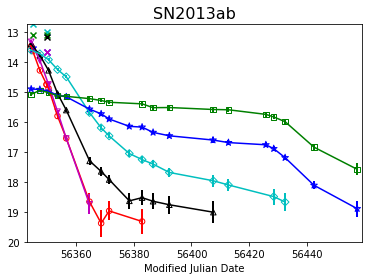

In [98]:
snname = 'SN2013ab'
filename =  snname + '_uvotB15.1.dat'
savename = snname + '_pylightcurve_s.jpg'
data = open(filename, 'r')

# Initializing lists needed to plot the different filters separately
uvw2mjd = []
uvw2mag = []
uvw2magerr = []
uvm2mjd = []
uvm2mag = []
uvm2magerr = []
uvw1mjd = []
uvw1mag = []
uvw1magerr = []
umjd = []
umag = []
umagerr = []
bmjd = []
bmag = []
bmagerr = []
vmjd = []
vmag = []
vmagerr = []

# Reading the data in from the file
for line in data:
    if not line[0] == "#":
        continue
    fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True)
print(fil, mjd, mag, magerr)
# replacing NULL with float value "nan"
for m in range(len(mag)):
    if mag[m] == "NULL":
        mag[m] = "nan"
for me in range(len(magerr)):
    if magerr[me] == "NULL":
        magerr[me] = "nan"
# turning lists into floats for appropriate data using list comprehension
mjd1 = [float(date) for date in mjd]
mag1 = [float(magnitude) for magnitude in mag]
magerr1 = [float(magnitudeerr) for magnitudeerr in magerr]
filters1 = fil
print(filters1, mjd1, mag1, magerr1)

# I needed to get rid of the NULL values in the ...15.1.dat files, so the next several lines are to make sure the 
# program doesn't shut down because of them
filterslist = []
mjdlist  = []
maglist = []
magerrlist = []
for ii in range(len(filters1)):
    if not np.isnan(mag1[ii]):
        filterslist.append(filters1[ii])
        maglist.append(mag1[ii])
        mjdlist.append(mjd1[ii])
        magerrlist.append(magerr1[ii])
filters = np.array(filterslist)
mjd = np.array(mjdlist)
mag = np.array(maglist)
magerr = np.array(magerrlist)
print(filters, mjd, mag, magerr)




# breaking up the filters, mjd, mag, and magerr arrays into separate arrays to make plotting easier
for i in range(len(filters)):
    if filters[i] == 'UVW2':
        uvw2mjd.append(mjd[i])
        uvw2mag.append(mag[i])
        uvw2magerr.append(magerr[i])
    if filters[i] == 'UVM2':
        uvm2mjd.append(mjd[i])
        uvm2mag.append(mag[i])
        uvm2magerr.append(magerr[i])
    if filters[i] == 'UVW1':
        uvw1mjd.append(mjd[i])
        uvw1mag.append(mag[i])
        uvw1magerr.append(magerr[i])
    if filters[i] == 'U':
        umjd.append(mjd[i])
        umag.append(mag[i])
        umagerr.append(magerr[i])
    if filters[i] == 'B':
        bmjd.append(mjd[i])
        bmag.append(mag[i])
        bmagerr.append(magerr[i])
    if filters[i] == 'V':
        vmjd.append(mjd[i])
        vmag.append(mag[i])
        vmagerr.append(magerr[i])


##########This begins plotting portion##########
plt.ion() #turns on interactive plotting
fig = plt.figure()
ax = fig.add_subplot(111)
#The next several lines are just to make sure the program doesn't shut down if one of the filters is missing 
if len(uvw2mag) > 0:
    ax.scatter(uvw2mjd, uvw2mag, linestyle='-', linewidth=1,marker='o', facecolors='none', edgecolors='r', s=30, label='uvw2', color = 'r')
    ax.errorbar(uvw2mjd, uvw2mag, yerr=uvw2magerr, elinewidth=2, capthick = 2, color = 'r')
if len(uvm2mag) > 0:
    ax.scatter(uvm2mjd, uvm2mag, linestyle='-', linewidth=1,marker='v',facecolors='none', edgecolors='m', s=30, label='uvm2', color= 'm')
    ax.errorbar(uvm2mjd, uvm2mag, yerr=uvm2magerr, elinewidth=2, capthick = 2, color='m')
if len(uvw1mag) > 0:
    ax.scatter(uvw1mjd, uvw1mag, linestyle='-', linewidth=1,marker='^', facecolors='none', edgecolors='k', s=30, label='uvw1', color= 'k')
    ax.errorbar(uvw1mjd, uvw1mag, yerr=uvw1magerr, elinewidth=2, capthick = 2, color='k')
if len(umag) > 0:
    ax.scatter(umjd, umag, linestyle='-', linewidth=1,marker='D',facecolors='none', edgecolors='c', s=30, label='uvot u', color= 'c')
    ax.errorbar(umjd, umag, yerr=umagerr, elinewidth=2, capthick = 2, color='c')
if len(bmag) > 0:
    ax.scatter(bmjd, bmag, linestyle='-', linewidth=1,marker='*',facecolors='none', edgecolors='b', s=50, label='uvot b', color= 'b')
    ax.errorbar(bmjd, bmag, yerr=bmagerr, elinewidth=2, capthick = 2, color='b')
if len(vmag) > 0:
    ax.scatter(vmjd, vmag, linestyle='-', linewidth=1,marker='s',facecolors='none', edgecolors='g', s=30, label='uvot v', color= 'g')
    ax.errorbar(vmjd, vmag, yerr=vmagerr, elinewidth=2, capthick = 2, color='g')

ax.scatter(SN2013ab_date, SN2013ab_umag, marker='x', color = 'c')
ax.scatter(SN2013ab_date, SN2013ab_bmag, marker='x', color = 'b')
ax.scatter(SN2013ab_date, SN2013ab_vmag, marker='x', color = 'g')
ax.scatter(SN2013ab_date, SN2013ab_uvm2mag, marker='x', color = 'm')
ax.scatter(SN2013ab_date, SN2013ab_uvw1mag, marker='x', color = 'k')
ax.scatter(SN2013ab_date, SN2013ab_uvw2mag, marker='x', color = 'r')

ax.invert_yaxis()

#ax.legend(bbox_to_anchor=(1.32,0.83))
#If you have labels specified in the plotting commands above, all you have to do is add this line to make a legend
#Also, apparently you can set the location to 'best' so it'll place it wherever python thinks it's the best
ax.set_xlabel('Modified Julian Date')

#ax.set_ylabel('Observed Vega Magnitude')

ax.set_title(snname, fontsize = 16)
#plt.title('UVOT Light Curves', fontsize = 12) 
#there aren't title and subtitle commands so instead I used suptitle and title to get a makeshift main title and subtitle

ax.axis([int(mjd.min())-1, math.ceil(np.amax(mjd))+1,math.ceil(np.amax(mag)+np.amax(magerr)), int(mag.min())-0.25])
'''
In order to make the axis format correctly, I used the minimum and maxiumum values for the MJD +/- 1 (in order to give the plots some extra
 space) on the x-axis, and the min and max values for the magnitude. The functions int() and math.ceil() are used to round the numbers to the
 nearest whole number to make the ends of the graph neater.
'''
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
#The line above makes sure that the x axis is formatted correctly. The Offset option in matplotlib is automatically activated, so for big
#numbers like the MJD, it cuts it off in a strange way that is awful to look at. This makes it readable.
#os.chdir(os.path.expanduser('~/Dropbox/SN/madison/'))
fig.savefig(savename) #you can uncomment this line if you want to save the figure to the SN file

#fig.show()
#os.chdir(os.path.expanduser('~/Dropbox/SN/madison/'))

# # Creating CSV file

In [99]:
import csv  

header = ['SN Name', 'uvw2', 'uvm2', 'uvw1', 'u', 'b', 'v']
data = ['SN2013ab', ynew1, ynew2, ynew3, ynew4, ynew5, ynew6]

with open('Spectraphotometry_Interpolation.csv', 'a', encoding='UTF8') as f:
    writer = csv.writer(f)

    # write the header
    #writer.writerow(header)

    # write the data
    writer.writerow(data)